<a href="https://colab.research.google.com/github/Sherine-6600/DSML-Projects/blob/main/Business_Case_Walmart_Confidence_Interval_and_CLT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table align="center" width="50%">
    <tr>
        <td width="100%">
            <img src="https://cdn.mos.cms.futurecdn.net/5StAbRHLA4ZdyzQZVivm2c.jpg" >
        </td>
    </tr>
</table>

# **About Walmart**

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.


# **Business Problem**

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

# **Defining Problem Statement and Analyzing basic metrics**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm,binom,poisson,stats
import math

In [ ]:
!gdown 1HNmkWgOEIT7urF8S0PqybLXD4LLWIjvNYeZvw_zJ1L0

Downloading...
From (original): https://drive.google.com/uc?id=1HNmkWgOEIT7urF8S0PqybLXD4LLWIjvNYeZvw_zJ1L0
From (redirected): https://docs.google.com/spreadsheets/d/1HNmkWgOEIT7urF8S0PqybLXD4LLWIjvNYeZvw_zJ1L0/export?format=xlsx
To: /content/walmart_data.xlsx
22.3MB [00:00, 182MB/s]


# **Dataset**

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:

**User_ID**:	User ID

**Product_ID**:	Product ID

**Gender**:	Sex of User

**Age**:	Age in bins

**Occupation**:	Occupation(Masked)

**City_Category**:	Category of the City (A,B,C)

**StayInCurrentCityYears**:	Number of years stay in current city

**Marital_Status**:	Marital Status

**ProductCategory**:	Product Category (Masked)

**Purchase**:	Purchase Amount

In [ ]:
df = pd.read_excel('walmart_data.xlsx')

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df.shape

(550068, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df.describe(include = 'all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068.0,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5.0,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1.0,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821.0,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


In [ ]:
cols = ['Occupation','Marital_Status','Product_Category']
df[cols] = df[cols].astype('object')

In [ ]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                    object
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                object
Product_Category              object
Purchase                       int64
dtype: object

In [ ]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

# **Business Insights based on Non- Graphical and Visual Analysis**

In [ ]:
cat_col = ['User_ID','Product_ID','Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category']
df_cat = df[cat_col].melt().groupby(['variable','value'])[['value']].count() / len(df)
df_cat.loc['Age']

,value
value,
0-17,0.027455
18-25,0.181178
26-35,0.399200
36-45,0.199999
46-50,0.083082
51-55,0.069993
55+,0.039093


In [ ]:
df_cat.loc['Gender']

,value
value,
F,0.246895
M,0.753105


In [ ]:
df_cat.loc['City_Category']

,value
value,
A,0.268549
B,0.420263
C,0.311189


In [ ]:
df_cat.loc['Stay_In_Current_City_Years']

,value
value,
0,0.135252
1,0.352358
2,0.185137
3,0.173224
4+,0.154028


In [ ]:
df_cat.loc['Marital_Status']

,value
value,
0,0.590347
1,0.409653


In [ ]:
df_cat.loc['Product_Category']

,value
value,
1,0.255201
2,0.043384
3,0.036746
4,0.021366
5,0.274390
6,0.037206
7,0.006765
8,0.207111
9,0.000745


In [ ]:
df_cat.loc['Occupation']

,value
value,
0,0.126599
1,0.086218
2,0.048336
3,0.032087
4,0.131453
5,0.022137
6,0.037005
7,0.107501
8,0.002811


In [ ]:
df.groupby(['User_ID'])['City_Category'].unique().value_counts()

City_Category
[C]    3139
[B]    1707
[A]    1045
Name: count, dtype: int64

In [ ]:
#Checking the age group distribution in different city categories
pd.crosstab(index=df["City_Category"],columns=df["Age"],margins=True,normalize="index")

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
City_Category,,,,,,,
A,0.017222,0.186400,0.499222,0.180185,0.051496,0.041288,0.024188
B,0.023511,0.187076,0.396171,0.205898,0.088272,0.076743,0.022330
C,0.041612,0.168705,0.316974,0.209131,0.103333,0.085649,0.074596
All,0.027455,0.181178,0.399200,0.199999,0.083082,0.069993,0.039093


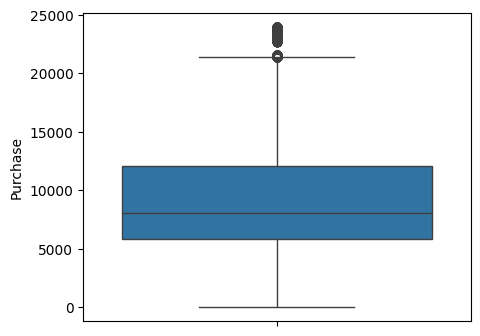

In [ ]:
plt.figure(figsize=(5, 4))
sns.boxplot(data=df, y='Purchase')
plt.show()

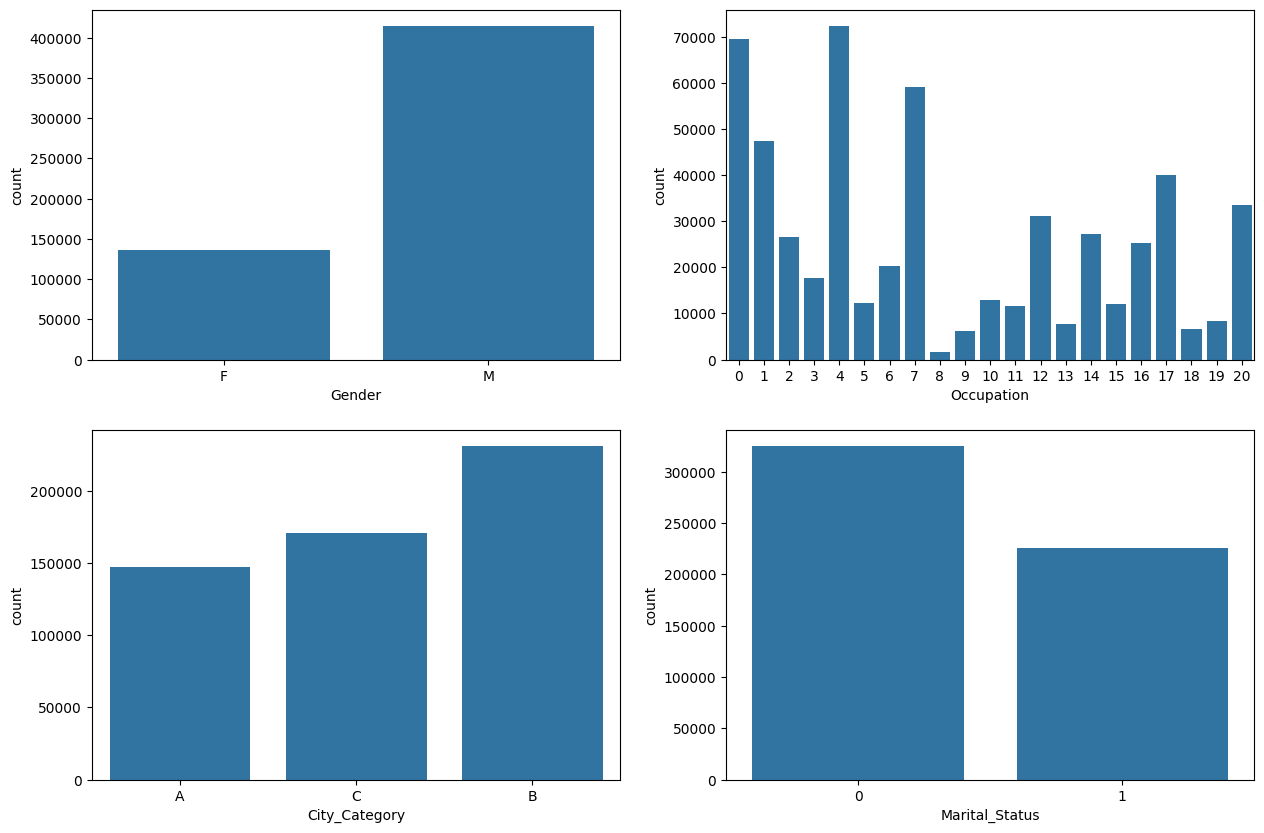

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
sns.countplot(data=df, x='Gender', ax=axs[0,0])
sns.countplot(data=df, x='Occupation', ax=axs[0,1])
sns.countplot(data=df, x='City_Category', ax=axs[1,0])
sns.countplot(data=df, x='Marital_Status', ax=axs[1,1])
plt.show()

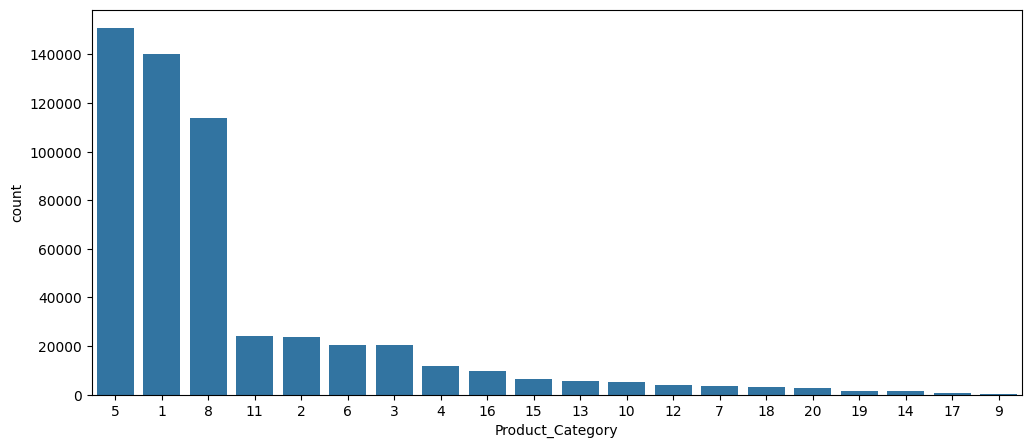

In [ ]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='Product_Category',order=df['Product_Category'].value_counts().index)
plt.show()

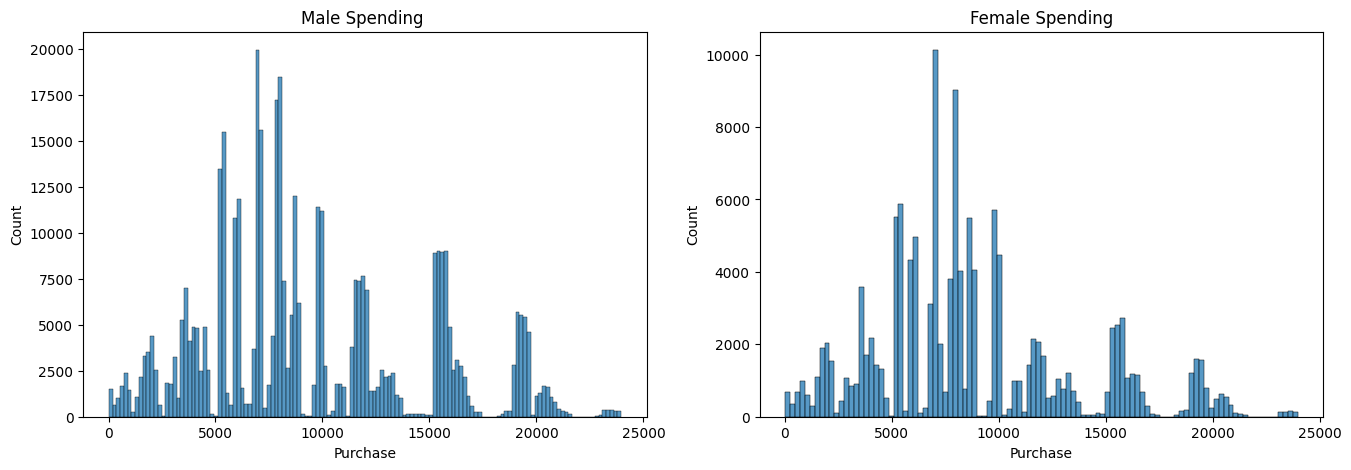

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
sns.histplot(data=df[df['Gender']=='M']['Purchase'], ax=axs[0]).set_title("Male Spending ")
sns.histplot(data=df[df['Gender']=='F']['Purchase'], ax=axs[1]).set_title("Female Spending")
plt.show()

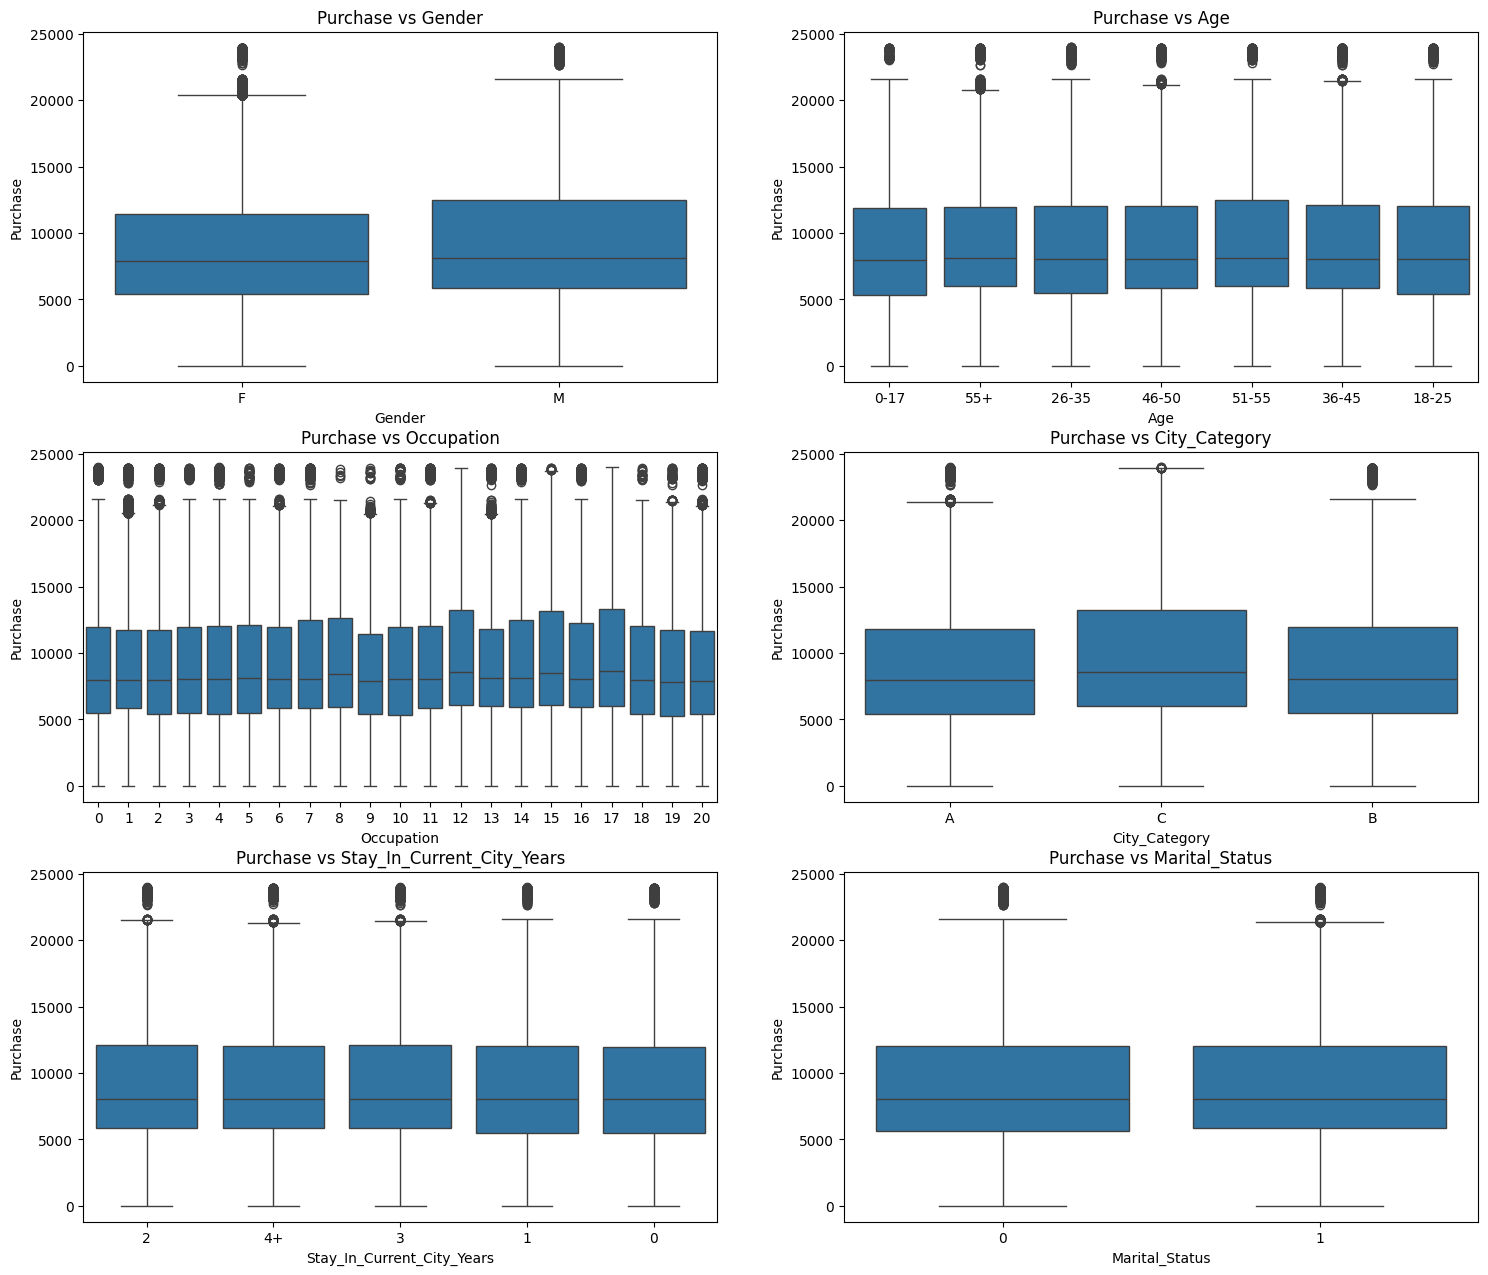

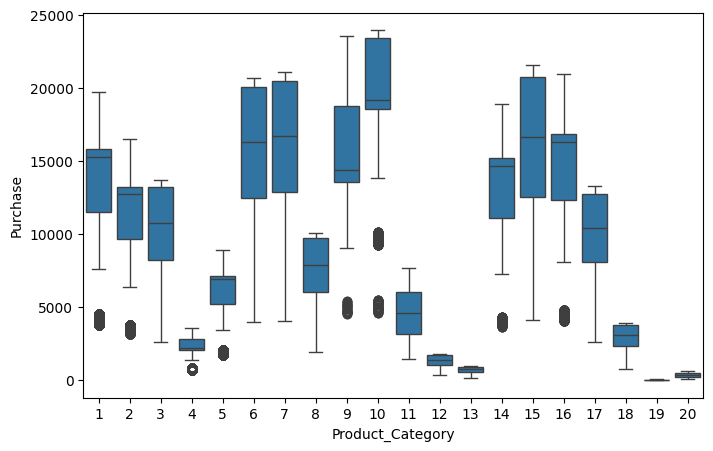

In [ ]:
attr = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 10))
fig.subplots_adjust(top=1.3)
count = 0
for row in range(3):
    for col in range(2):
        sns.boxplot(data=df, y='Purchase', x=attr[count], ax=axs[row, col],)
        axs[row,col].set_title(f"Purchase vs {attr[count]}")
        count += 1
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, y='Purchase', x='Product_Category')
plt.show()

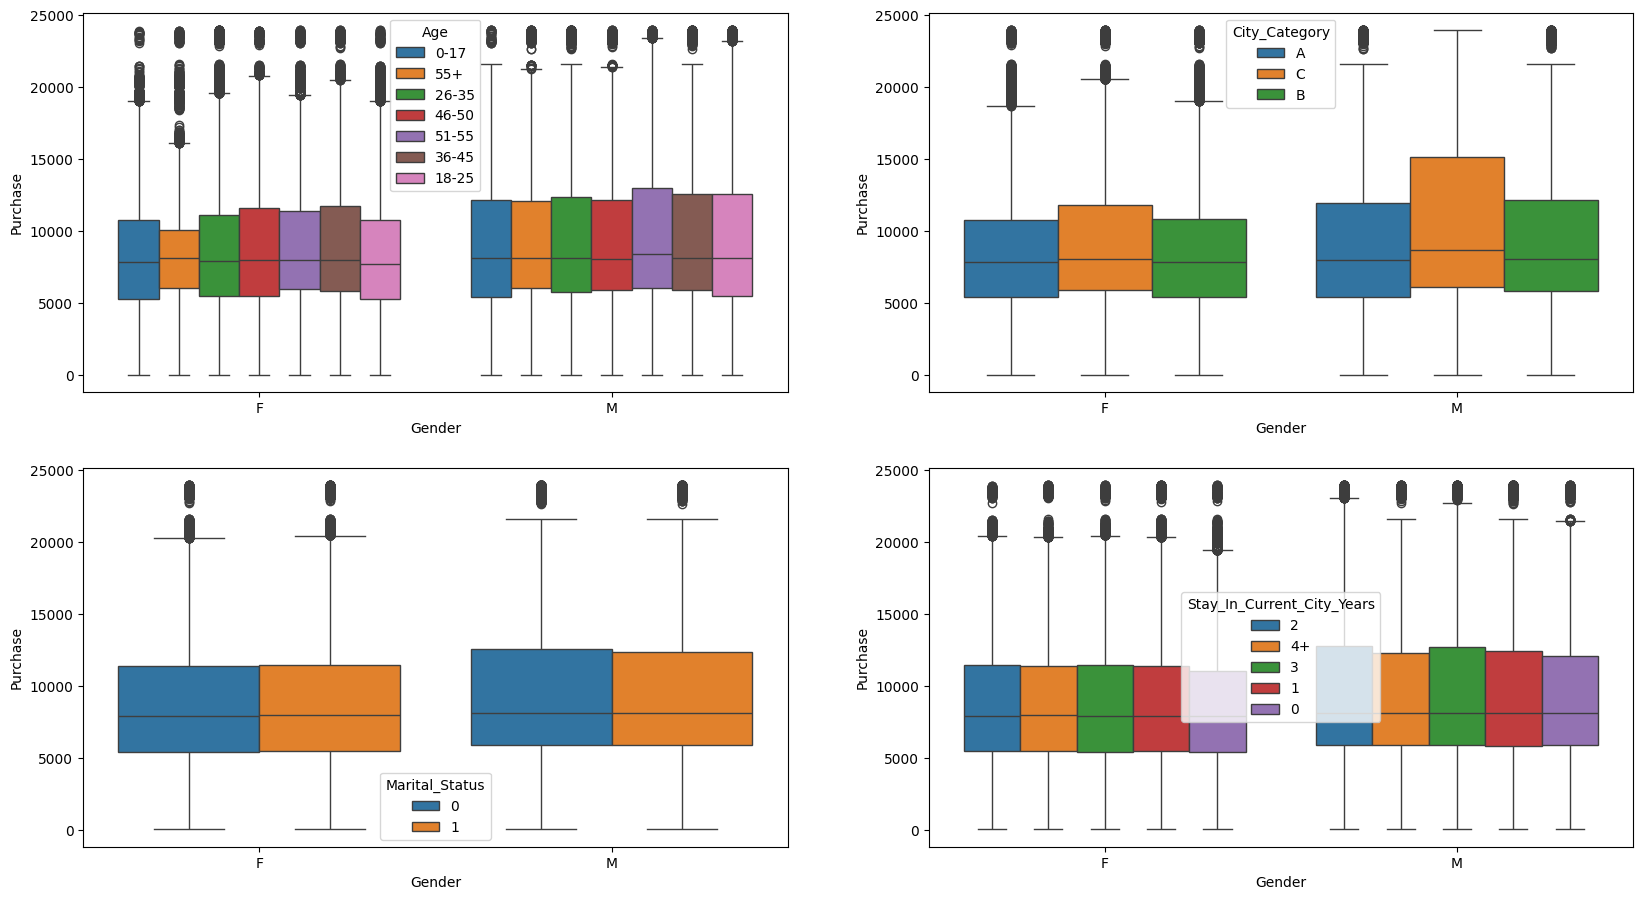

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))
fig.subplots_adjust(top=1.5)
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Age', ax=axs[0,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='City_Category', ax=axs[0,1])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Marital_Status', ax=axs[1,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Stay_In_Current_City_Years', ax=axs[1,1])

plt.show()

# **Answering questions**

# **1. Average amount spend by males are higher than females.**

In [ ]:
avgamt_gender = df.groupby(['User_ID', 'Gender'])[['Purchase']].sum()
avgamt_gender = avgamt_gender.reset_index()
avgamt_gender

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


In [ ]:
avgamt_gender['Gender'].value_counts()

Gender
M    4225
F    1666
Name: count, dtype: int64

Text(0.5, 1.0, 'Males Avg Spend')

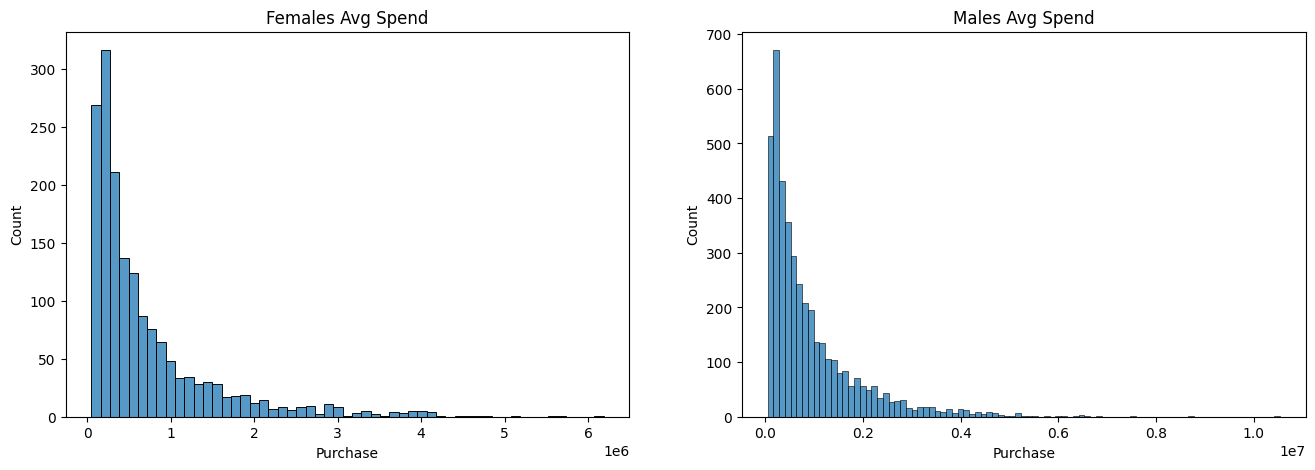

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=avgamt_gender[avgamt_gender['Gender']=='F']['Purchase'], ax=axs[0]).set_title("Females Avg Spend")
sns.histplot(data=avgamt_gender[avgamt_gender['Gender']=='M']['Purchase'], ax=axs[1]).set_title("Males Avg Spend")


In [ ]:
avgamt_gender.groupby(['Gender'])[['Purchase']].mean()

,Purchase
Gender,
F,712024.394958
M,925344.402367


In [ ]:
avgamt_gender.groupby(['Gender'])['Purchase'].sum()

Gender
F    1186232642
M    3909580100
Name: Purchase, dtype: int64

In [ ]:
avgamt_male = avgamt_gender[avgamt_gender['Gender']=='M']
avgamt_female = avgamt_gender[avgamt_gender['Gender']=='F']

In [ ]:
#Finding the sample(sample size=1000) for avg purchase amount for males and females
genders = ["M", "F"]

sample_size = 1000

num_repitions = 1000
male_means = []
female_means = []

for i in range(num_repitions):
    male_mean = avgamt_male.sample(sample_size, replace=True)['Purchase'].mean()
    female_mean = avgamt_female.sample(sample_size, replace=True)['Purchase'].mean()

    male_means.append(male_mean)
    female_means.append(female_mean)

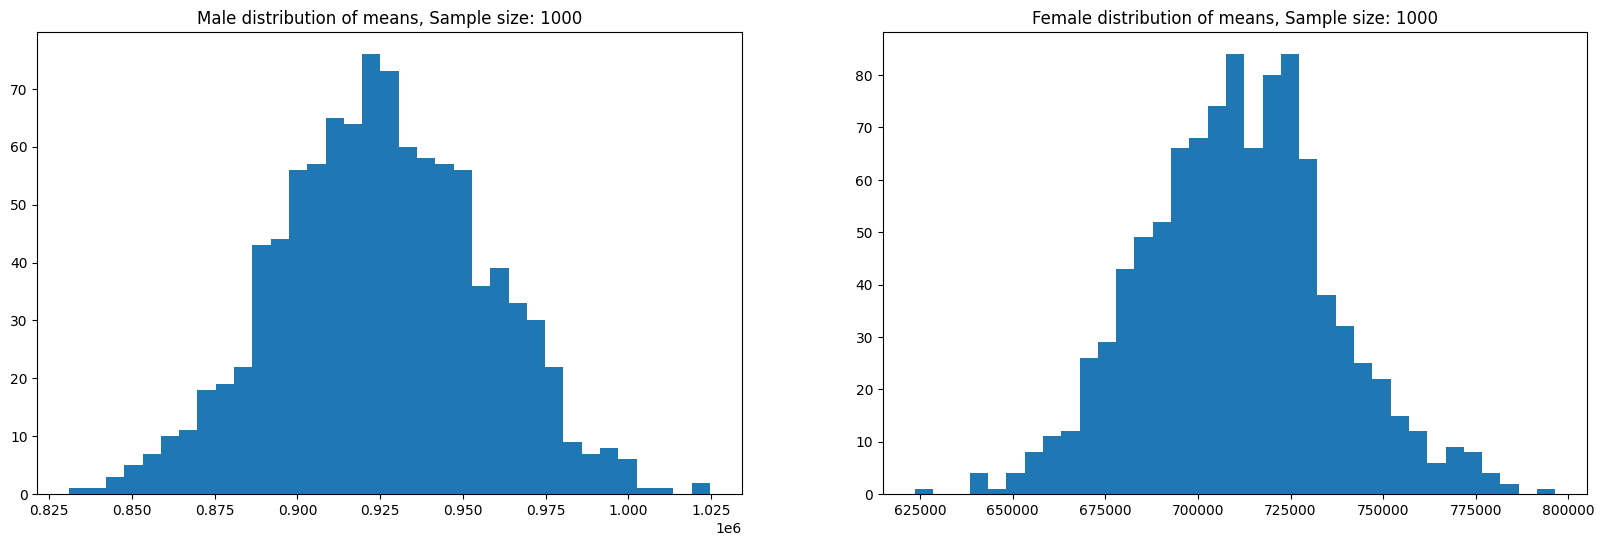

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(male_means, bins=35)
axis[1].hist(female_means, bins=35)
axis[0].set_title("Male distribution of means, Sample size: 1000")
axis[1].set_title("Female distribution of means, Sample size: 1000")

plt.show()

In [ ]:
#Taking the values for z at 90%, 95% and 99% confidence interval as:
z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

print("Population avg spend amount for Male: {:.2f}".format(avgamt_male['Purchase'].mean()))
print("Population avg spend amount for Female: {:.2f}\n".format(avgamt_female['Purchase'].mean()))

print("Sample avg spend amount for Male: {:.2f}".format(np.mean(male_means)))
print("Sample avg spend amount for Female: {:.2f}\n".format(np.mean(female_means)))

print("Sample std for Male: {:.2f}".format(pd.Series(male_means).std()))
print("Sample std for Female: {:.2f}\n".format(pd.Series(female_means).std()))

print("Sample std error for Male: {:.2f}".format(pd.Series(male_means).std()/np.sqrt(1000)))
print("Sample std error for Female: {:.2f}\n".format(pd.Series(female_means).std()/np.sqrt(1000)))

sample_mean_male=np.mean(male_means)
sample_mean_female=np.mean(female_means)

sample_std_male=pd.Series(male_means).std()
sample_std_female=pd.Series(female_means).std()

sample_std_error_male=sample_std_male/np.sqrt(1000)
sample_std_error_female=sample_std_female/np.sqrt(1000)

Upper_Limit_male=z90*sample_std_error_male + sample_mean_male
Lower_Limit_male=sample_mean_male - z90*sample_std_error_male

Upper_Limit_female=z90*sample_std_error_female + sample_mean_female
Lower_Limit_female=sample_mean_female - z90*sample_std_error_female

print("Male_CI: ",[Lower_Limit_male,Upper_Limit_male])
print("Female_CI: ",[Lower_Limit_female,Upper_Limit_female])

Population avg spend amount for Male: 925344.40
Population avg spend amount for Female: 712024.39

Sample avg spend amount for Male: 925561.28
Sample avg spend amount for Female: 710661.15

Sample std for Male: 31192.52
Sample std for Female: 25502.75

Sample std error for Male: 986.39
Sample std error for Female: 806.47

Male_CI:  [923938.6594026927, 927183.8961513073]
Female_CI:  [709334.5155275775, 711987.7943704225]


In [ ]:
#Taking the values for z at 90%, 95% and 99% confidence interval as:
z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

print("Population avg spend amount for Male: {:.2f}".format(avgamt_male['Purchase'].mean()))
print("Population avg spend amount for Female: {:.2f}\n".format(avgamt_female['Purchase'].mean()))

print("Sample avg spend amount for Male: {:.2f}".format(np.mean(male_means)))
print("Sample avg spend amount for Female: {:.2f}\n".format(np.mean(female_means)))

print("Sample std for Male: {:.2f}".format(pd.Series(male_means).std()))
print("Sample std for Female: {:.2f}\n".format(pd.Series(female_means).std()))

print("Sample std error for Male: {:.2f}".format(pd.Series(male_means).std()/np.sqrt(1000)))
print("Sample std error for Female: {:.2f}\n".format(pd.Series(female_means).std()/np.sqrt(1000)))

sample_mean_male=np.mean(male_means)
sample_mean_female=np.mean(female_means)

sample_std_male=pd.Series(male_means).std()
sample_std_female=pd.Series(female_means).std()

sample_std_error_male=sample_std_male/np.sqrt(1000)
sample_std_error_female=sample_std_female/np.sqrt(1000)

Upper_Limit_male=z95*sample_std_error_male + sample_mean_male
Lower_Limit_male=sample_mean_male - z95*sample_std_error_male

Upper_Limit_female=z95*sample_std_error_female + sample_mean_female
Lower_Limit_female=sample_mean_female - z95*sample_std_error_female

print("Male_CI: ",[Lower_Limit_male,Upper_Limit_male])
print("Female_CI: ",[Lower_Limit_female,Upper_Limit_female])

Population avg spend amount for Male: 925344.40
Population avg spend amount for Female: 712024.39

Sample avg spend amount for Male: 925561.28
Sample avg spend amount for Female: 710661.15

Sample std for Male: 31192.52
Sample std for Female: 25502.75

Sample std error for Male: 986.39
Sample std error for Female: 806.47

Male_CI:  [923627.9452459104, 927494.6103080895]
Female_CI:  [709080.4781915604, 712241.8317064396]


In [ ]:
#Taking the values for z at 90%, 95% and 99% confidence interval as:
z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

print("Population avg spend amount for Male: {:.2f}".format(avgamt_male['Purchase'].mean()))
print("Population avg spend amount for Female: {:.2f}\n".format(avgamt_female['Purchase'].mean()))

print("Sample avg spend amount for Male: {:.2f}".format(np.mean(male_means)))
print("Sample avg spend amount for Female: {:.2f}\n".format(np.mean(female_means)))

print("Sample std for Male: {:.2f}".format(pd.Series(male_means).std()))
print("Sample std for Female: {:.2f}\n".format(pd.Series(female_means).std()))

print("Sample std error for Male: {:.2f}".format(pd.Series(male_means).std()/np.sqrt(1000)))
print("Sample std error for Female: {:.2f}\n".format(pd.Series(female_means).std()/np.sqrt(1000)))

sample_mean_male=np.mean(male_means)
sample_mean_female=np.mean(female_means)

sample_std_male=pd.Series(male_means).std()
sample_std_female=pd.Series(female_means).std()

sample_std_error_male=sample_std_male/np.sqrt(1000)
sample_std_error_female=sample_std_female/np.sqrt(1000)

Upper_Limit_male=z99*sample_std_error_male + sample_mean_male
Lower_Limit_male=sample_mean_male - z99*sample_std_error_male

Upper_Limit_female=z99*sample_std_error_female + sample_mean_female
Lower_Limit_female=sample_mean_female - z99*sample_std_error_female

print("Male_CI: ",[Lower_Limit_male,Upper_Limit_male])
print("Female_CI: ",[Lower_Limit_female,Upper_Limit_female])

Population avg spend amount for Male: 925344.40
Population avg spend amount for Female: 712024.39

Sample avg spend amount for Male: 925561.28
Sample avg spend amount for Female: 710661.15

Sample std for Male: 31192.52
Sample std for Female: 25502.75

Sample std error for Male: 986.39
Sample std error for Female: 806.47

Male_CI:  [923020.3264504252, 928102.2291035748]
Female_CI:  [708583.6940677937, 712738.6158302063]


In [ ]:
#Finding the sample(sample size=1000) avg purchase amount for males and females
genders = ["M", "F"]

sample_size = 1500

num_repitions = 1000
male_means = []
female_means = []

for i in range(num_repitions):
    male_mean = avgamt_male.sample(sample_size, replace=True)['Purchase'].mean()
    female_mean = avgamt_female.sample(sample_size, replace=True)['Purchase'].mean()

    male_means.append(male_mean)
    female_means.append(female_mean)

#Taking the values for z at 90%, 95% and 99% confidence interval as:
z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

print("Population avg spend amount for Male: {:.2f}".format(avgamt_male['Purchase'].mean()))
print("Population avg spend amount for Female: {:.2f}\n".format(avgamt_female['Purchase'].mean()))

print("Sample avg spend amount for Male: {:.2f}".format(np.mean(male_means)))
print("Sample avg spend amount for Female: {:.2f}\n".format(np.mean(female_means)))

print("Sample std for Male: {:.2f}".format(pd.Series(male_means).std()))
print("Sample std for Female: {:.2f}\n".format(pd.Series(female_means).std()))

print("Sample std error for Male: {:.2f}".format(pd.Series(male_means).std()/np.sqrt(1500)))
print("Sample std error for Female: {:.2f}\n".format(pd.Series(female_means).std()/np.sqrt(1500)))

sample_mean_male=np.mean(male_means)
sample_mean_female=np.mean(female_means)

sample_std_male=pd.Series(male_means).std()
sample_std_female=pd.Series(female_means).std()

sample_std_error_male=sample_std_male/np.sqrt(1500)
sample_std_error_female=sample_std_female/np.sqrt(1500)

Upper_Limit_male=z90*sample_std_error_male + sample_mean_male
Lower_Limit_male=sample_mean_male - z90*sample_std_error_male

Upper_Limit_female=z90*sample_std_error_female + sample_mean_female
Lower_Limit_female=sample_mean_female - z90*sample_std_error_female

print("Male_CI: ",[Lower_Limit_male,Upper_Limit_male])
print("Female_CI: ",[Lower_Limit_female,Upper_Limit_female])

Population avg spend amount for Male: 925344.40
Population avg spend amount for Female: 712024.39

Sample avg spend amount for Male: 926100.18
Sample avg spend amount for Female: 711930.60

Sample std for Male: 25255.47
Sample std for Female: 20515.82

Sample std error for Male: 652.09
Sample std error for Female: 529.72

Male_CI:  [925027.4896306304, 927172.8772000364]
Female_CI:  [711059.2206148305, 712801.9864905027]


In [ ]:
#Calculating 95% confidence interval for sample size 1500:
print("Population avg spend amount for Male: {:.2f}".format(avgamt_male['Purchase'].mean()))
print("Population avg spend amount for Female: {:.2f}\n".format(avgamt_female['Purchase'].mean()))

print("Sample avg spend amount for Male: {:.2f}".format(np.mean(male_means)))
print("Sample avg spend amount for Female: {:.2f}\n".format(np.mean(female_means)))

print("Sample std for Male: {:.2f}".format(pd.Series(male_means).std()))
print("Sample std for Female: {:.2f}\n".format(pd.Series(female_means).std()))

print("Sample std error for Male: {:.2f}".format(pd.Series(male_means).std()/np.sqrt(1500)))
print("Sample std error for Female: {:.2f}\n".format(pd.Series(female_means).std()/np.sqrt(1500)))

sample_mean_male=np.mean(male_means)
sample_mean_female=np.mean(female_means)

sample_std_male=pd.Series(male_means).std()
sample_std_female=pd.Series(female_means).std()

sample_std_error_male=sample_std_male/np.sqrt(1500)
sample_std_error_female=sample_std_female/np.sqrt(1500)

Upper_Limit_male=z95*sample_std_error_male + sample_mean_male
Lower_Limit_male=sample_mean_male - z95*sample_std_error_male

Upper_Limit_female=z95*sample_std_error_female + sample_mean_female
Lower_Limit_female=sample_mean_female - z95*sample_std_error_female

print("Male_CI: ",[Lower_Limit_male,Upper_Limit_male])
print("Female_CI: ",[Lower_Limit_female,Upper_Limit_female])

Population avg spend amount for Male: 925344.40
Population avg spend amount for Female: 712024.39

Sample avg spend amount for Male: 926100.18
Sample avg spend amount for Female: 711930.60

Sample std for Male: 25255.47
Sample std for Female: 20515.82

Sample std error for Male: 652.09
Sample std error for Female: 529.72

Male_CI:  [924822.0801824958, 927378.286648171]
Female_CI:  [710892.3600522662, 712968.8470530671]


In [ ]:
#Calculating 99% confidence interval for sample size 1500:
print("Population avg spend amount for Male: {:.2f}".format(avgamt_male['Purchase'].mean()))
print("Population avg spend amount for Female: {:.2f}\n".format(avgamt_female['Purchase'].mean()))

print("Sample avg spend amount for Male: {:.2f}".format(np.mean(male_means)))
print("Sample avg spend amount for Female: {:.2f}\n".format(np.mean(female_means)))

print("Sample std for Male: {:.2f}".format(pd.Series(male_means).std()))
print("Sample std for Female: {:.2f}\n".format(pd.Series(female_means).std()))

print("Sample std error for Male: {:.2f}".format(pd.Series(male_means).std()/np.sqrt(1500)))
print("Sample std error for Female: {:.2f}\n".format(pd.Series(female_means).std()/np.sqrt(1500)))

sample_mean_male=np.mean(male_means)
sample_mean_female=np.mean(female_means)

sample_std_male=pd.Series(male_means).std()
sample_std_female=pd.Series(female_means).std()

sample_std_error_male=sample_std_male/np.sqrt(1500)
sample_std_error_female=sample_std_female/np.sqrt(1500)

Upper_Limit_male=z99*sample_std_error_male + sample_mean_male
Lower_Limit_male=sample_mean_male - z99*sample_std_error_male

Upper_Limit_female=z99*sample_std_error_female + sample_mean_female
Lower_Limit_female=sample_mean_female - z99*sample_std_error_female

print("Male_CI: ",[Lower_Limit_male,Upper_Limit_male])
print("Female_CI: ",[Lower_Limit_female,Upper_Limit_female])

Population avg spend amount for Male: 925344.40
Population avg spend amount for Female: 712024.39

Sample avg spend amount for Male: 926100.18
Sample avg spend amount for Female: 711930.60

Sample std for Male: 25255.47
Sample std for Female: 20515.82

Sample std error for Male: 652.09
Sample std error for Female: 529.72

Male_CI:  [924420.3905950325, 927779.9762356343]
Female_CI:  [710566.0549521403, 713295.1521531929]


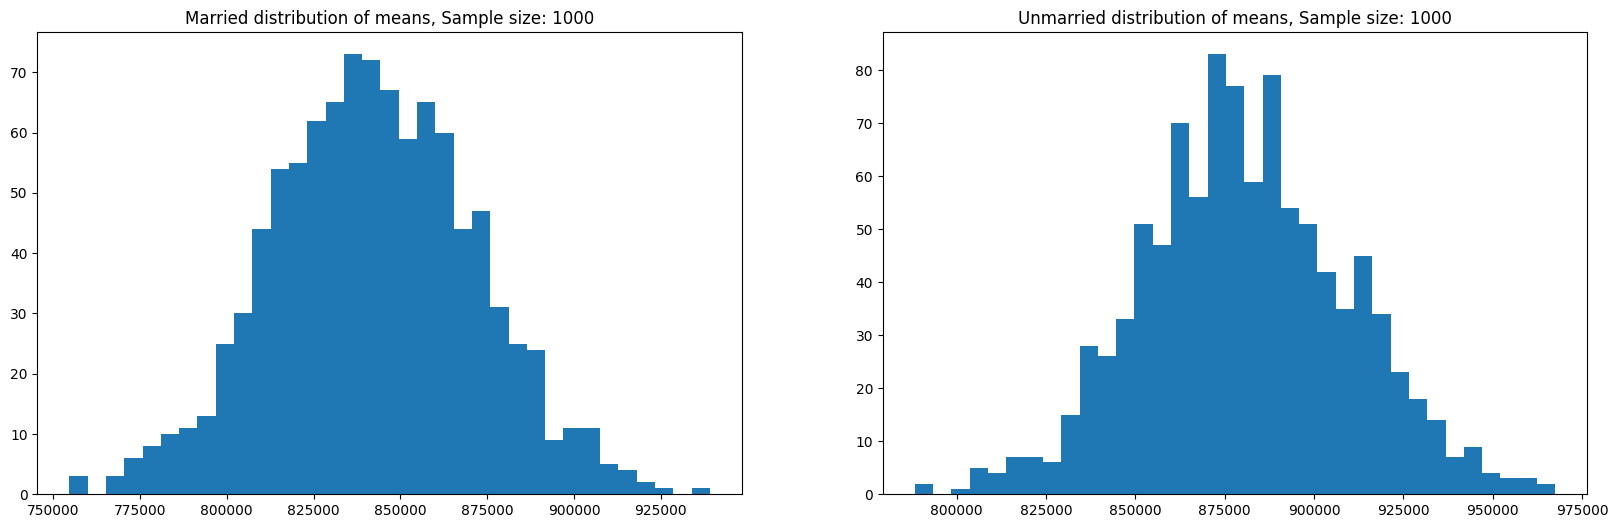

In [ ]:
#CLT and Confidence interval considering marital status:
avg_Marital = df.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum()
avg_Marital = avg_Marital.reset_index()

avgamt_married = avg_Marital[avg_Marital['Marital_Status']==1]
avgamt_single = avg_Marital[avg_Marital['Marital_Status']==0]

sample_size = 1000
num_repitions = 1000
married_means = []
single_means = []

for i in range(num_repitions):
    avg_married = avg_Marital[avg_Marital['Marital_Status']==1].sample(sample_size, replace=True)['Purchase'].mean()
    avg_single = avg_Marital[avg_Marital['Marital_Status']==0].sample(sample_size, replace=True)['Purchase'].mean()

    married_means.append(avg_married)
    single_means.append(avg_single)


fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(married_means, bins=35)
axis[1].hist(single_means, bins=35)
axis[0].set_title("Married distribution of means, Sample size: 1000")
axis[1].set_title("Unmarried distribution of means, Sample size: 1000")

plt.show()

In [ ]:
avg_Marital['Marital_Status'].value_counts()

Marital_Status
0    3417
1    2474
Name: count, dtype: int64

In [ ]:
#Calculating 90% confidence interval for avg expenses for married/single for sample size 1000:
#Taking the values for z at 90%, 95% and 99% confidence interval as:
z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

print("Population avg spend amount for Married: {:.2f}".format(avgamt_married['Purchase'].mean()))
print("Population avg spend amount for Single: {:.2f}\n".format(avgamt_single['Purchase'].mean()))

print("Sample avg spend amount for Married: {:.2f}".format(np.mean(married_means)))
print("Sample avg spend amount for Single: {:.2f}\n".format(np.mean(single_means)))

print("Sample std for Married: {:.2f}".format(pd.Series(married_means).std()))
print("Sample std for Single: {:.2f}\n".format(pd.Series(single_means).std()))

print("Sample std error for Married: {:.2f}".format(pd.Series(married_means).std()/np.sqrt(1000)))
print("Sample std error for Single: {:.2f}\n".format(pd.Series(single_means).std()/np.sqrt(1000)))

sample_mean_married=np.mean(married_means)
sample_mean_single=np.mean(single_means)

sample_std_married=pd.Series(married_means).std()
sample_std_single=pd.Series(single_means).std()

sample_std_error_married=sample_std_married/np.sqrt(1000)
sample_std_error_single=sample_std_single/np.sqrt(1000)

Upper_Limit_married=z90*sample_std_error_male + sample_mean_married
Lower_Limit_married=sample_mean_married - z90*sample_std_error_married

Upper_Limit_single=z90*sample_std_error_single + sample_mean_single
Lower_Limit_single=sample_mean_single - z90*sample_std_error_single

print("Married_CI: ",[Lower_Limit_married,Upper_Limit_married])
print("Single_CI: ",[Lower_Limit_single,Upper_Limit_single])

Population avg spend amount for Married: 843526.80
Population avg spend amount for Single: 880575.78

Sample avg spend amount for Married: 842264.77
Sample avg spend amount for Single: 880628.52

Sample std for Married: 29255.35
Sample std for Single: 28957.13

Sample std error for Married: 925.14
Sample std error for Single: 915.70

Married_CI:  [840742.9203350471, 843337.461970703]
Single_CI:  [879122.1895219311, 882134.858010069]


In [ ]:
#Calculating 95% confidence interval for avg expenses for married/single for sample size 1000:
#Taking the values for z at 90%, 95% and 99% confidence interval as:
z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

print("Population avg spend amount for Married: {:.2f}".format(avgamt_married['Purchase'].mean()))
print("Population avg spend amount for Single: {:.2f}\n".format(avgamt_single['Purchase'].mean()))

print("Sample avg spend amount for Married: {:.2f}".format(np.mean(married_means)))
print("Sample avg spend amount for Single: {:.2f}\n".format(np.mean(single_means)))

print("Sample std for Married: {:.2f}".format(pd.Series(married_means).std()))
print("Sample std for Single: {:.2f}\n".format(pd.Series(single_means).std()))

print("Sample std error for Married: {:.2f}".format(pd.Series(married_means).std()/np.sqrt(1000)))
print("Sample std error for Single: {:.2f}\n".format(pd.Series(single_means).std()/np.sqrt(1000)))

sample_mean_married=np.mean(married_means)
sample_mean_single=np.mean(single_means)

sample_std_married=pd.Series(married_means).std()
sample_std_single=pd.Series(single_means).std()

sample_std_error_married=sample_std_married/np.sqrt(1000)
sample_std_error_single=sample_std_single/np.sqrt(1000)

Upper_Limit_married=z95*sample_std_error_male + sample_mean_married
Lower_Limit_married=sample_mean_married - z95*sample_std_error_married

Upper_Limit_single=z95*sample_std_error_single + sample_mean_single
Lower_Limit_single=sample_mean_single - z95*sample_std_error_single

print("Married_CI: ",[Lower_Limit_married,Upper_Limit_married])
print("Single_CI: ",[Lower_Limit_single,Upper_Limit_single])

Population avg spend amount for Married: 843526.80
Population avg spend amount for Single: 880575.78

Sample avg spend amount for Married: 842264.77
Sample avg spend amount for Single: 880628.52

Sample std for Married: 29255.35
Sample std for Single: 28957.13

Sample std error for Married: 925.14
Sample std error for Single: 915.70

Married_CI:  [840451.5026614603, 843542.8714188376]
Single_CI:  [878833.7425390243, 882423.3049929758]


In [ ]:
#Calculating 99% confidence interval for avg expenses for married/single for sample size 1000:
#Taking the values for z at 90%, 95% and 99% confidence interval as:
z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

print("Population avg spend amount for Married: {:.2f}".format(avgamt_married['Purchase'].mean()))
print("Population avg spend amount for Single: {:.2f}\n".format(avgamt_single['Purchase'].mean()))

print("Sample avg spend amount for Married: {:.2f}".format(np.mean(married_means)))
print("Sample avg spend amount for Single: {:.2f}\n".format(np.mean(single_means)))

print("Sample std for Married: {:.2f}".format(pd.Series(married_means).std()))
print("Sample std for Single: {:.2f}\n".format(pd.Series(single_means).std()))

print("Sample std error for Married: {:.2f}".format(pd.Series(married_means).std()/np.sqrt(1000)))
print("Sample std error for Single: {:.2f}\n".format(pd.Series(single_means).std()/np.sqrt(1000)))

sample_mean_married=np.mean(married_means)
sample_mean_single=np.mean(single_means)

sample_std_married=pd.Series(married_means).std()
sample_std_single=pd.Series(single_means).std()

sample_std_error_married=sample_std_married/np.sqrt(1000)
sample_std_error_single=sample_std_single/np.sqrt(1000)

Upper_Limit_married=z99*sample_std_error_male + sample_mean_married
Lower_Limit_married=sample_mean_married - z99*sample_std_error_married

Upper_Limit_single=z99*sample_std_error_single + sample_mean_single
Lower_Limit_single=sample_mean_single - z99*sample_std_error_single

print("Married_CI: ",[Lower_Limit_married,Upper_Limit_married])
print("Single_CI: ",[Lower_Limit_single,Upper_Limit_single])

Population avg spend amount for Married: 843526.80
Population avg spend amount for Single: 880575.78

Sample avg spend amount for Married: 842264.77
Sample avg spend amount for Single: 880628.52

Sample std for Married: 29255.35
Sample std for Single: 28957.13

Sample std error for Married: 925.14
Sample std error for Single: 915.70

Married_CI:  [839881.6192108906, 843944.5610063008]
Single_CI:  [878269.6684391176, 882987.3790928825]


In [ ]:
avgamt_age = df.groupby(['User_ID', 'Age'])[['Purchase']].sum()
avgamt_age = avgamt_age.reset_index()

avgamt_age['Age'].value_counts()

Age
26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: count, dtype: int64

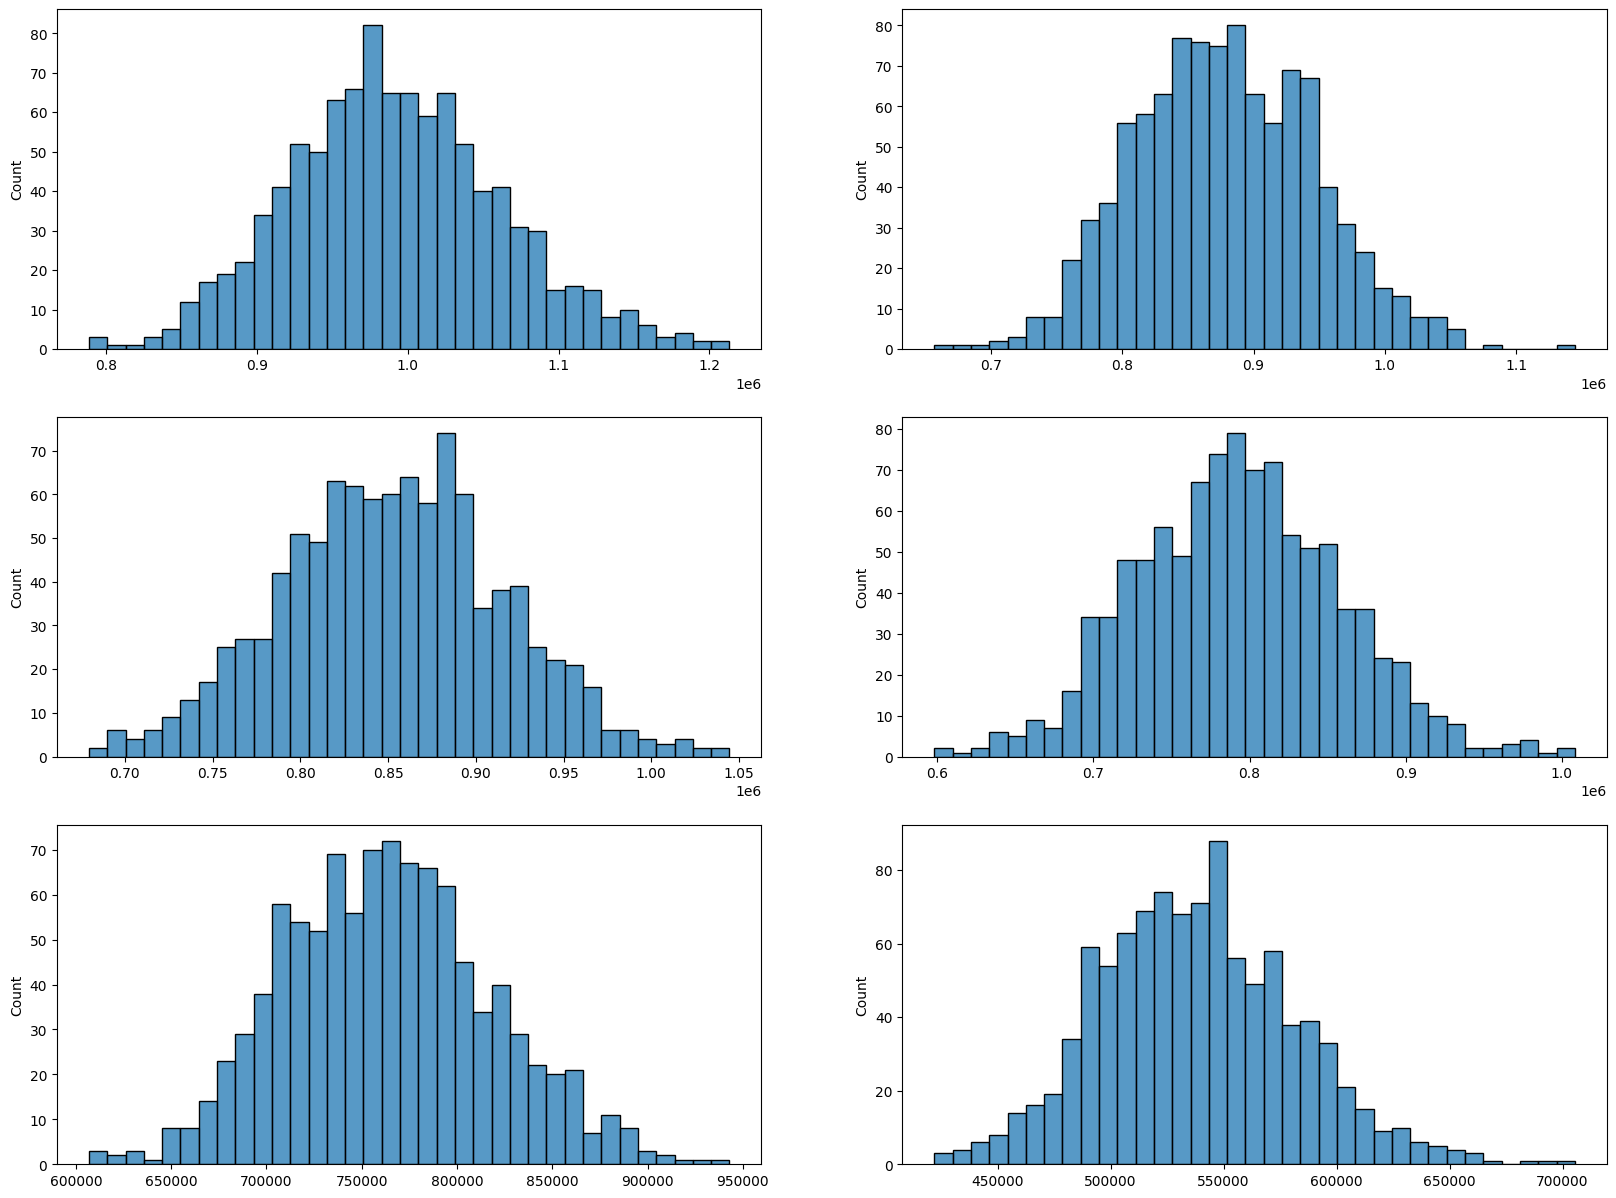

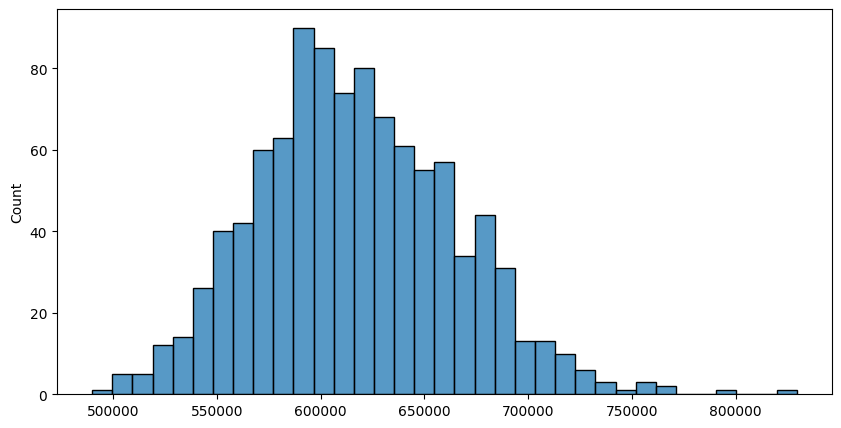

In [ ]:
sample_size = 200
num_repitions = 1000

all_sample_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for i in age_intervals:
    all_sample_means[i] = []

for i in age_intervals:
    for j in range(num_repitions):

        mean = avgamt_age[avgamt_age['Age']==i].sample(sample_size, replace=True)['Purchase'].mean()
        all_sample_means[i].append(mean)



fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

sns.histplot(all_sample_means['26-35'],bins=35,ax=axis[0,0])
sns.histplot(all_sample_means['36-45'],bins=35,ax=axis[0,1])
sns.histplot(all_sample_means['18-25'],bins=35,ax=axis[1,0])
sns.histplot(all_sample_means['46-50'],bins=35,ax=axis[1,1])
sns.histplot(all_sample_means['51-55'],bins=35,ax=axis[2,0])
sns.histplot(all_sample_means['55+'],bins=35,ax=axis[2,1])

plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(all_sample_means['0-17'],bins=35)
plt.show()

In [ ]:
#Calculating 90% confidence interval for avg expenses for different age groups for sample size 200:
z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

sample_size = 200
num_repitions = 1000

all_population_means={}
all_sample_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for i in age_intervals:
    all_sample_means[i] = []
    all_population_means[i]=[]
    population_mean=avgamt_age[avgamt_age['Age']==i]['Purchase'].mean()
    all_population_means[i].append(population_mean)

print("All age group population mean: \n", all_population_means)
print("\n")

for i in age_intervals:
    for j in range(num_repitions):

        mean = avgamt_age[avgamt_age['Age']==i].sample(sample_size, replace=True)['Purchase'].mean()
        all_sample_means[i].append(mean)


for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:

    new_df = avgamt_age[avgamt_age['Age']==val]

    std_error = z90*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - std_error
    upper_lim = sample_mean + std_error

    print("For age {} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

All age group population mean: 
 {'26-35': [989659.3170969313], '36-45': [879665.7103684661], '18-25': [854863.119738073], '46-50': [792548.7815442561], '51-55': [763200.9230769231], '55+': [539697.2446236559], '0-17': [618867.8119266055]}


For age 26-35 confidence interval of means: (952206.28, 1027112.35)
For age 36-45 confidence interval of means: (832398.89, 926932.53)
For age 18-25 confidence interval of means: (810187.65, 899538.59)
For age 46-50 confidence interval of means: (726209.00, 858888.57)
For age 51-55 confidence interval of means: (703772.36, 822629.48)
For age 55+ confidence interval of means: (487032.92, 592361.57)
For age 0-17 confidence interval of means: (542320.46, 695415.16)


In [ ]:
#Calculating 95% confidence interval for avg expenses for different age groups for sample size 200:
z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

sample_size = 200
num_repitions = 1000

all_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for i in age_intervals:
    all_means[i] = []

for i in age_intervals:
    for j in range(num_repitions):
        mean = avgamt_age[avgamt_age['Age']==i].sample(sample_size, replace=True)['Purchase'].mean()
        all_means[i].append(mean)
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:

    new_df = avgamt_age[avgamt_age['Age']==val]

    std_error = z95*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - std_error
    upper_lim = sample_mean + std_error

    print("For age {} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 26-35 confidence interval of means: (945034.42, 1034284.21)
For age 36-45 confidence interval of means: (823347.80, 935983.62)
For age 18-25 confidence interval of means: (801632.78, 908093.46)
For age 46-50 confidence interval of means: (713505.63, 871591.93)
For age 51-55 confidence interval of means: (692392.43, 834009.42)
For age 55+ confidence interval of means: (476948.26, 602446.23)
For age 0-17 confidence interval of means: (527662.46, 710073.17)


In [ ]:
#Calculating 99% confidence interval for avg expenses for different age groups for sample size 200:
z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

sample_size = 200
num_repitions = 1000

all_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for i in age_intervals:
    all_means[i] = []

for i in age_intervals:
    for j in range(num_repitions):
        mean = avgamt_age[avgamt_age['Age']==i].sample(sample_size, replace=True)['Purchase'].mean()
        all_means[i].append(mean)
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:

    new_df = avgamt_age[avgamt_age['Age']==val]

    std_error = z99*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - std_error
    upper_lim = sample_mean + std_error

    print("For age {} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 26-35 confidence interval of means: (931009.46, 1048309.18)
For age 36-45 confidence interval of means: (805647.89, 953683.53)
For age 18-25 confidence interval of means: (784903.24, 924823.00)
For age 46-50 confidence interval of means: (688663.50, 896434.06)
For age 51-55 confidence interval of means: (670138.33, 856263.52)
For age 55+ confidence interval of means: (457227.15, 622167.34)
For age 0-17 confidence interval of means: (498997.92, 738737.71)


# **Question:**
1.Are women spending more money per transaction than men? Why or Why not?

Ans: No. CI's of male and female do not overlap and upper limits of female purchase CI are lesser than lower limits of male purchase CI. This proves that men usually spend more than women (NOTE: as per data 77% contibutions are from men and only 23% purchases are from women).

The reason for less purchase by women could have several factors:

  Males might be doing the purchase for females.
  Salary can be a factor in less purchase.
  We also need to see whether male-based products were sold more than women-based products to clearly identify difference in spending pattern.
  If the female based products quality/quantity needs to be improved for women purchasing.

2. Confidence intervals and distribution of the mean of the expenses by female and male customers.

At 99% Confidence Interval with sample size 1000

Average amount spend by male customers lie in the range 9,22,011.28 - 9,27,154.61

Average amount spend by female customers lie in range 7,09,678.88 - 7,13,811.31


3. Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?

Ans: No. Confidence intervals of average male and female spending are not overlapping. This trend can be changed via introducing female centric marketing strategies by Walmart so that more female customers are attracted to increase female purchases to achieve comparable statistics close to 50%.

4. Results when the same activity is performed for Married vs Unmarried

At 99% Confidence Interval with sample size 1000

Average amount spend by married customers lie in the range:  [841059.6309378392, 845078.140167503]
Average amount spend by unmarried customers lie in the range:  [879093.3492016713, 884078.6782803286]

5. Results when the same activity is performed for Age

At 99% Confidence Interval with sample size 200

For age 26-35 confidence interval of means: (931009.46,1048309.18)
For age 36-45 confidence interval of means: (805647.89, 953683.53)
For age 18-25 confidence interval of means: (784903.24, 924823.00)
For age 46-50 confidence interval of means: (688663.50, 896434.06)
For age 51-55 confidence interval of means: (670138.33, 856263.52)
For age 55+ confidence interval of means: (457227.15, 622167.34)
For age 0-17 confidence interval of means: (498997.92, 738737.71)

# **Recommendations**

1. Men spent more money than women, company can focus on retaining the male customers and getting more male customers.

2. Product_Category - 1, 5, 8 have highest purchasing frequency. it means these are the products in these categories are in more demand. Company can focus on selling more of these products.

3. Unmarried customers spend more money than married customers, So company should focus on acquisition of Unmarried customers.

4. Customers in the age 26-35 spend more money than the others, So company should focus on acquisition of customers who are in the age 26-35.

5. We have more customers aged 26-35 in the city category B and A, company can focus more on these customers for these cities to increase the business.

6. Male customers living in City_Category C spend more money than other male customers living in B or C, Selling more products in the City_Category C will help the company increase the revenue.

7. Some of the Product category like 19,20,13 have very less purchase. Company can think of dropping it.

8. The top 10 users who have purchased more company should give more offers and discounts so that they can be retained and can be helpful for companies business.

9. The occupation which are contributing more company can think of offering credit cards or other benefits to those customers by liasing with some financial partners to increase the sales.

10. The top products should be given focus in order to maintain the quality in order to further increase the sales of those products.

11. People who are staying in city for an year have contributed to 35% of the total purchase amount. Company can focus on such customer base who are neither too old nor too new residents in the city.

12. We have highest frequency of purchase order between 5k and 10k, company can focus more on these mid range products to increase the sales.